In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from category_encoders import TargetEncoder


In [2]:
df = pd.read_csv("historical_data.csv")
test_df=pd.read_csv("predict_data.csv")

In [3]:
df.head()

,Unnamed: 0,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0,3779.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0,4024.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0,1781.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0,3075.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0,2390.0


In [4]:
test_df.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    197428 non-null  int64  
 1   market_id                                     196441 non-null  float64
 2   created_at                                    197428 non-null  object 
 3   actual_delivery_time                          197421 non-null  object 
 4   store_id                                      197428 non-null  int64  
 5   subtotal                                      197428 non-null  int64  
 6   total_onshift_dashers                         181166 non-null  float64
 7   total_busy_dashers                            181166 non-null  float64
 8   total_outstanding_orders                      181166 non-null  float64
 9   estimated_store_to_consumer_driving_duration  19

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   subtotal                                      54778 non-null  int64  
 4   total_onshift_dashers                         50145 non-null  float64
 5   total_busy_dashers                            50145 non-null  float64
 6   total_outstanding_orders                      50145 non-null  float64
 7   estimated_store_to_consumer_driving_duration  54767 non-null  float64
 8   delivery_id                                   54778 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [7]:
df.describe()

,Unnamed: 0,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
count,197428.00000,196441.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,196902.000000,1.974210e+05
mean,98713.50000,2.978706,3530.510272,2682.331402,44.808093,41.739747,58.050065,545.358935,2.908257e+03
std,56992.69881,1.524867,2053.496711,1823.093688,34.526783,32.145733,52.661830,219.352902,1.922961e+04
min,0.00000,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,1.010000e+02
25%,49356.75000,2.000000,1686.000000,1400.000000,17.000000,15.000000,17.000000,382.000000,2.104000e+03
50%,98713.50000,3.000000,3592.000000,2200.000000,37.000000,34.000000,41.000000,544.000000,2.660000e+03
75%,148070.25000,4.000000,5299.000000,3395.000000,65.000000,62.000000,85.000000,702.000000,3.381000e+03
max,197427.00000,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000,8.516859e+06


## As there are negative values in some columns as shown in the cell above , we will replace them to 0 as those columns can't contain negative values

In [8]:
def handle_negative_values(columns):
    for col in columns:
        df.loc[df[col]<0,col]=0
        test_df.loc[test_df[col]<0,col]=0

handle_negative_values(['total_onshift_dashers','total_busy_dashers','total_outstanding_orders'])   

## Discovering the percentage of null values in each column

In [9]:
Null_dict={"NUll Percentage per column": (df.isnull().sum()/len(df))}
Null_df=pd.DataFrame(Null_dict).sort_values('NUll Percentage per column',ascending=False)
Null_df.head(50)

,NUll Percentage per column
total_onshift_dashers,0.082369
total_busy_dashers,0.082369
total_outstanding_orders,0.082369
market_id,0.004999
estimated_store_to_consumer_driving_duration,0.002664
actual_delivery_time,0.000035
total_delivery_duration_seconds,0.000035
Unnamed: 0,0.000000
created_at,0.000000
store_id,0.000000


## Dealing with missing values based on the columns distribution 

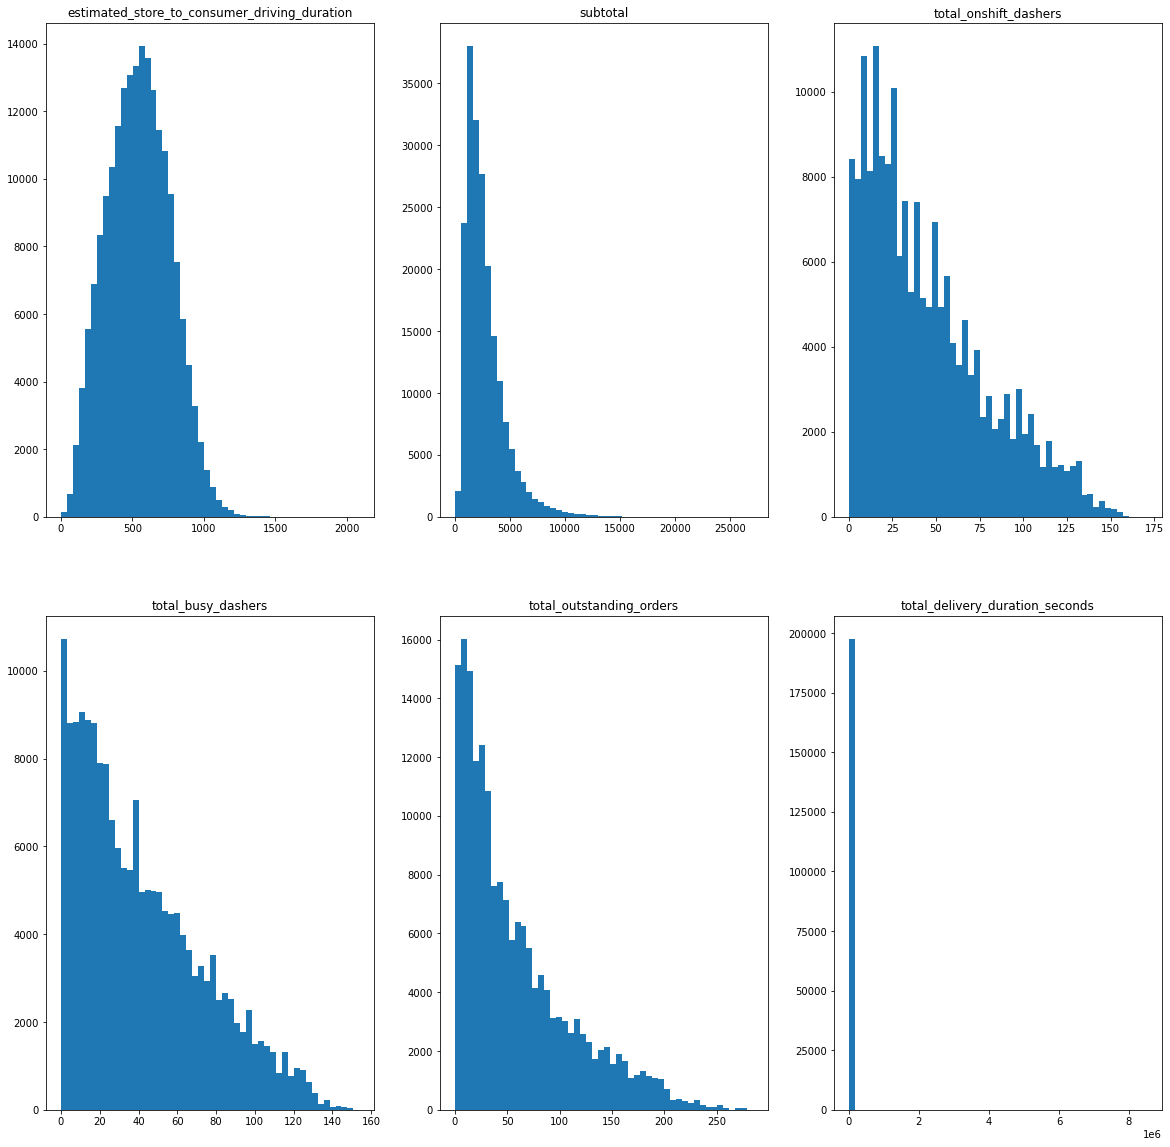

In [10]:
def plot_numerical_columns_distribution(numerical_columns):
    fig, axes = plt.subplots(2, 3, figsize=(20, 20))
    for i,col in enumerate(numerical_columns):
        axes[int(i/3)][i%3].hist(df[col],bins=50)
        axes[int(i/3)][i%3].set_title(col)
    
numerical_columns = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','total_delivery_duration_seconds']

plot_numerical_columns_distribution(numerical_columns)

In [11]:
## If the column is skewed we replace the Null values with the median 
## If the column is almost normally distributed we replace the null values with the mean
## The categorical columns are imputed using the mode
estimated_duration_mean=df['estimated_store_to_consumer_driving_duration'].mean()
total_onshift_dashers_median=df['total_onshift_dashers'].median()
total_busy_dashers_median=df['total_busy_dashers'].median()
total_outstanding_orders_median=df['total_outstanding_orders'].median()

df['estimated_store_to_consumer_driving_duration'].fillna(estimated_duration_mean,inplace=True)
test_df['estimated_store_to_consumer_driving_duration'].fillna(estimated_duration_mean,inplace=True)
df['total_onshift_dashers'].fillna(total_onshift_dashers_median,inplace=True)
test_df['total_onshift_dashers'].fillna(total_onshift_dashers_median,inplace=True)
df['total_busy_dashers'].fillna(total_busy_dashers_median,inplace=True)
test_df['total_busy_dashers'].fillna(total_busy_dashers_median,inplace=True)
df['total_outstanding_orders'].fillna(total_outstanding_orders_median,inplace=True)
test_df['total_outstanding_orders'].fillna(total_outstanding_orders_median,inplace=True)

market_id_mode=df['market_id'].mode()[0]
df['market_id'].fillna(market_id_mode,inplace=True)
test_df['market_id'].fillna(market_id_mode,inplace=True)

In [12]:
df.dropna(inplace=True)

## Checking for duplicates

In [13]:
print("Number of duplicate records in the training data: " + str(df.duplicated().sum()))
print("Number of duplicate records in the test data: " + str(test_df.duplicated().sum()))

Number of duplicate records in the training data: 0
Number of duplicate records in the test data: 0


## Dealing with Outliers

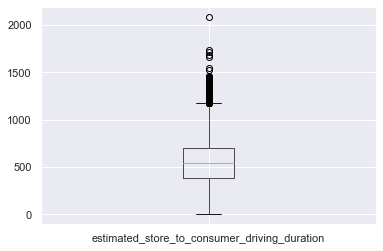

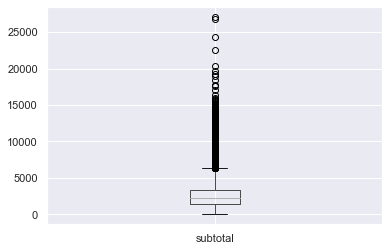

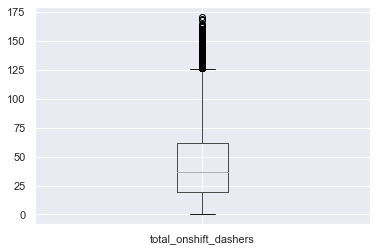

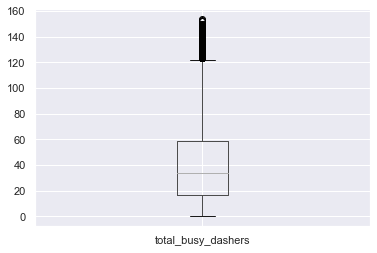

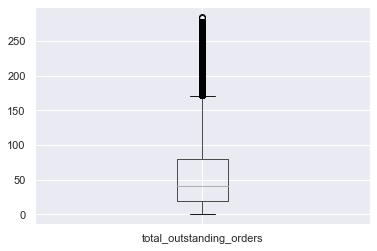

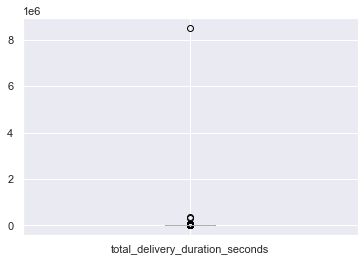

In [14]:
sns.set(rc={'figure.figsize':(6,4)})
def check_for_outliers(numerical_columns):
    for i,col in enumerate(numerical_columns):
        box_plt = df.boxplot(column=[col])
        plt.show()

numerical_columns = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','total_delivery_duration_seconds']
check_for_outliers(numerical_columns)

In [15]:
def get_number_of_outliers(col_name):
    Q3,Q1=df[col_name].quantile(0.75),df[col_name].quantile(0.25)
    IQR=Q3-Q1
    outliersCount=len(df[df[col_name]>Q3+1.5*IQR])
    print(col_name+" has " +str(outliersCount) + " outliers")
    
for col in numerical_columns:
    get_number_of_outliers(col)

estimated_store_to_consumer_driving_duration has 378 outliers
subtotal has 9054 outliers
total_onshift_dashers has 4660 outliers
total_busy_dashers has 2877 outliers
total_outstanding_orders has 8505 outliers
total_delivery_duration_seconds has 6277 outliers


In [16]:
## remove outliers and see the effect on box plots again
df=df.query('total_delivery_duration_seconds < 2e6 and subtotal < 20000' )

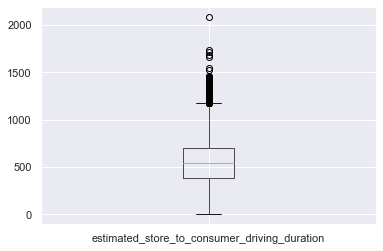

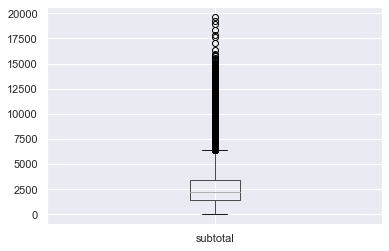

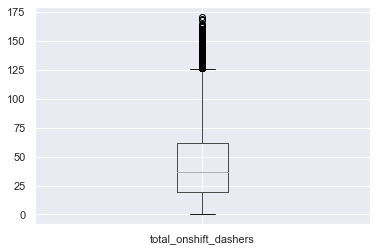

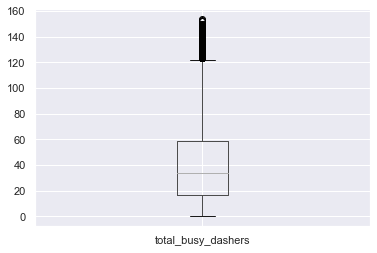

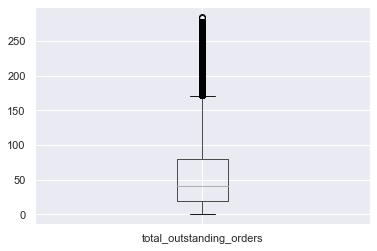

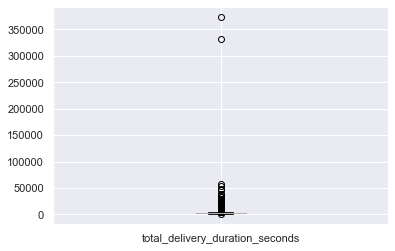

In [17]:
check_for_outliers(numerical_columns)

In [18]:
## remove the outliers in the output column
df=df.query('total_delivery_duration_seconds < 7000 ' )

## Covariance matrix plot

In [19]:
 df.corr()

,Unnamed: 0,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,total_delivery_duration_seconds
Unnamed: 0,1.000000,0.019378,-0.046655,-0.019778,-0.009821,-0.009793,-0.011700,-0.000990,-0.013129
market_id,0.019378,1.000000,0.017156,-0.016426,0.023998,0.014284,0.005585,0.007139,-0.045751
store_id,-0.046655,0.017156,1.000000,-0.013216,-0.020449,-0.020403,-0.016791,0.002407,-0.009125
subtotal,-0.019778,-0.016426,-0.013216,1.000000,0.128624,0.123568,0.127954,0.034381,0.229360
total_onshift_dashers,-0.009821,0.023998,-0.020449,0.128624,1.000000,0.943878,0.936407,0.045192,0.084012
total_busy_dashers,-0.009793,0.014284,-0.020403,0.123568,0.943878,1.000000,0.933286,0.043779,0.104368
total_outstanding_orders,-0.011700,0.005585,-0.016791,0.127954,0.936407,0.933286,1.000000,0.038823,0.192725
estimated_store_to_consumer_driving_duration,-0.000990,0.007139,0.002407,0.034381,0.045192,0.043779,0.038823,1.000000,0.245649
total_delivery_duration_seconds,-0.013129,-0.045751,-0.009125,0.229360,0.084012,0.104368,0.192725,0.245649,1.000000


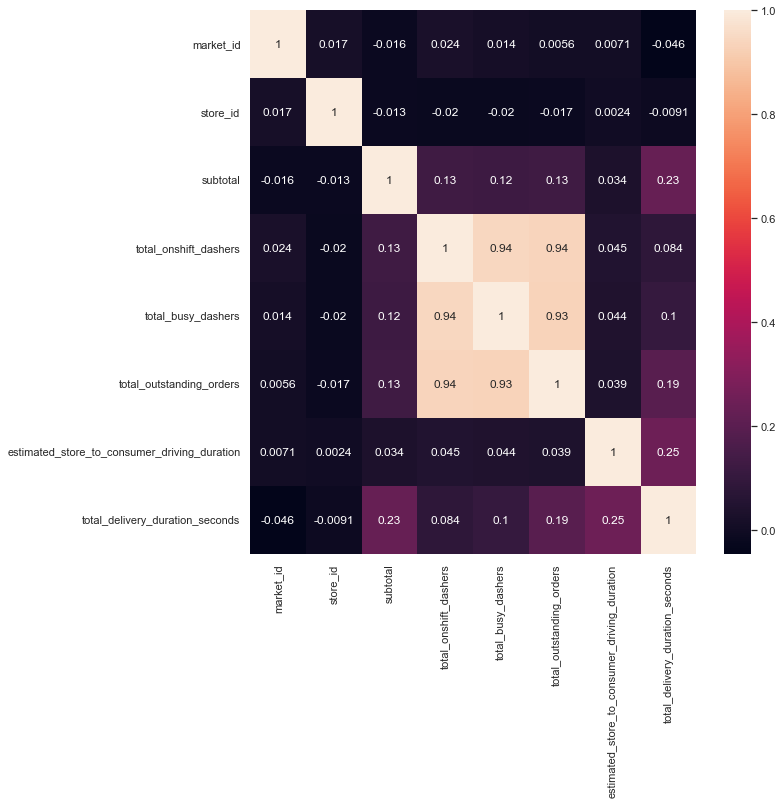

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.iloc[:,1:].corr(),annot=True); 

### we can see from the correlation matrix that the features that has the highest correlation with the target are (estimated driving time , subtotal , total outstanding orders) although they still have weak correlation 

## Handling the Date column ('created_at') and applying one hot encoding to the date components

In [21]:
def applyOneHotEncoding(columns):
    oh_encoder = OneHotEncoder(sparse=False,drop='first')
    encoded_market_col = pd.DataFrame(oh_encoder.fit_transform(df[columns]),index=df.index)
    encoded_market_col.columns=oh_encoder.get_feature_names()
    updated_df=pd.concat([df,encoded_market_col],axis=1)

    encoded_market_col_test = pd.DataFrame(oh_encoder.transform(test_df[columns]),index=test_df.index)
    encoded_market_col_test.columns=oh_encoder.get_feature_names()
    updated_test_df=pd.concat([test_df,encoded_market_col_test],axis=1)
    return updated_df,updated_test_df

In [22]:
def preprocessDateColumn():
    df['created_at']=pd.to_datetime(df['created_at'])
    df['created_at_month']=df['created_at'].dt.month
    df['created_at_day']=df['created_at'].dt.dayofweek
    df['created_at_hour']=df['created_at'].dt.hour
    
    test_df['created_at']=pd.to_datetime(test_df['created_at'])
    test_df['created_at_month']=test_df['created_at'].dt.month
    test_df['created_at_day']=test_df['created_at'].dt.dayofweek
    test_df['created_at_hour']=test_df['created_at'].dt.hour
    
    to_be_encoded_cols=['created_at_month','created_at_day','created_at_hour']
    updated_df,updated_test_df=applyOneHotEncoding(to_be_encoded_cols)
    
#     new_df.drop(columns=['created_at'],inplace=True)
#     new_test_df.drop(columns=['created_at'],inplace=True)
    
#     new_df.drop(columns=to_be_encoded_cols,inplace=True)
#     new_test_df.drop(columns=to_be_encoded_cols,inplace=True)
    
    
    return updated_df,updated_test_df
df,test_df=preprocessDateColumn()


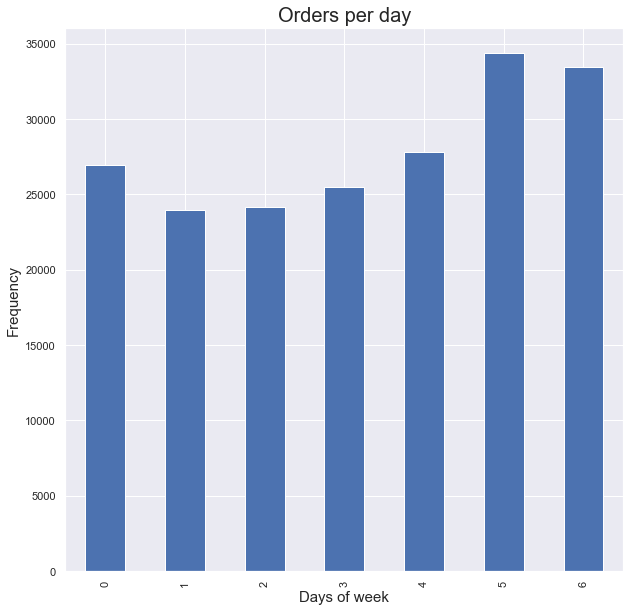

In [23]:
df.groupby('created_at_day')['created_at_day'].count().plot.bar();
plt.xlabel("Days of week",fontsize=15);
plt.ylabel("Frequency",fontsize=15);
plt.title("Orders per day",fontsize=20);

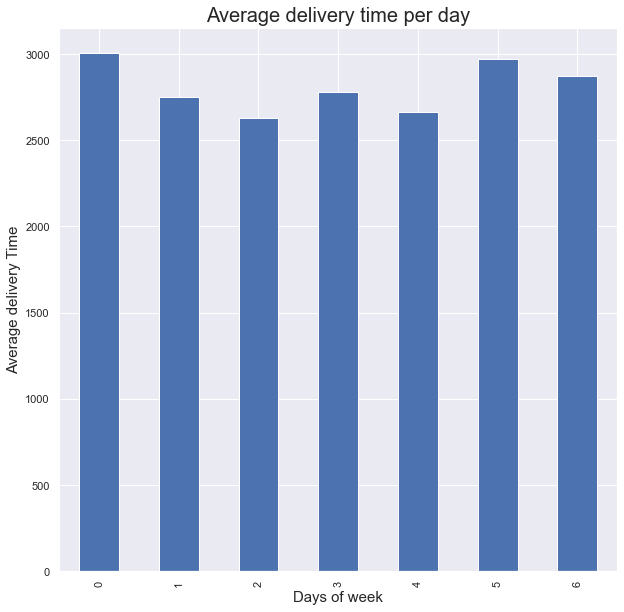

In [24]:
df.groupby('created_at_day')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Days of week",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per day",fontsize=20);

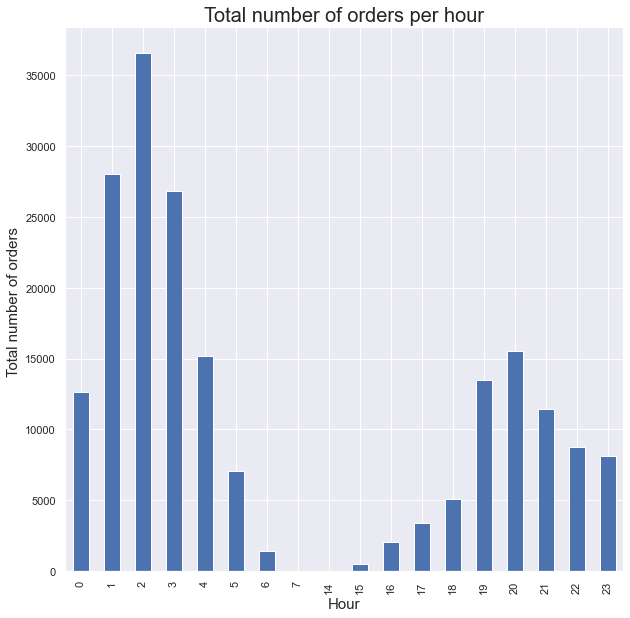

In [25]:
df.groupby('created_at_hour')['created_at_hour'].count().plot.bar();
plt.xlabel("Hour",fontsize=15);
plt.ylabel("Total number of orders ",fontsize=15);
plt.title("Total number of orders per hour",fontsize=20);

## we can see in the plot below that there are hours very busy with orders while other hours are much less busy with orders

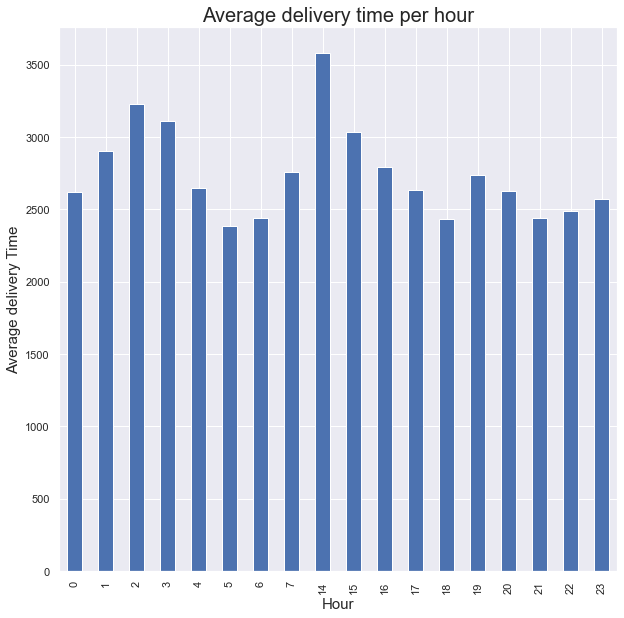

In [26]:
df.groupby('created_at_hour')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Hour",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per hour",fontsize=20);

## we can notice that there are some hours that has total average delivery time more than other

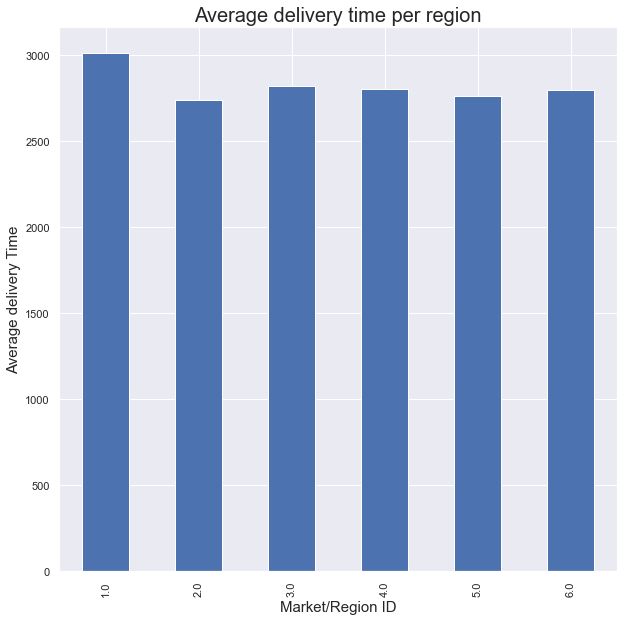

In [27]:
df.groupby('market_id')['total_delivery_duration_seconds'].mean().plot.bar();
plt.xlabel("Market/Region ID",fontsize=15);
plt.ylabel("Average delivery Time",fontsize=15);
plt.title("Average delivery time per region",fontsize=20);

## we can see that all regions has nearly the same average delivery time

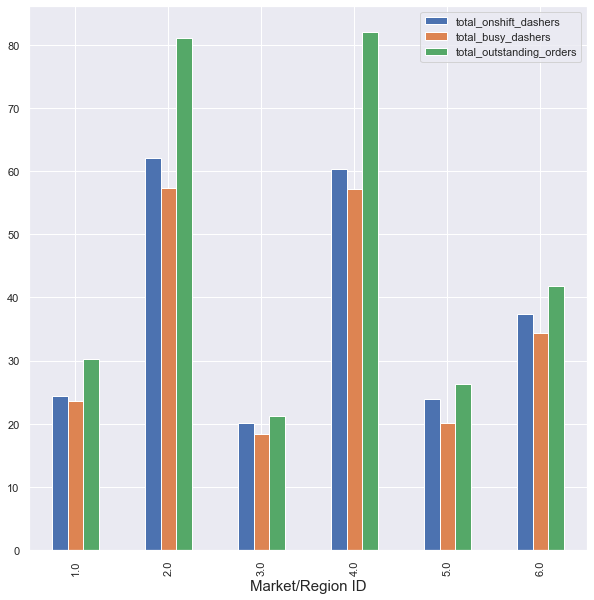

In [28]:
df.groupby('market_id')['total_onshift_dashers','total_busy_dashers','total_outstanding_orders'].mean().plot.bar(legend=True);
plt.xlabel("Market/Region ID",fontsize=15);

## we can see from the plot below that per market , 
## the average number of available drivers is slightly higher than the number of idle drivers
## also we can see that some markets has average number of orders and drivers much more than other markets as region/market (2,4)

## Applying one hot encoding for Market_id column

In [29]:
df,test_df=applyOneHotEncoding(['market_id']);


In [30]:
df.columns

Index(['Unnamed: 0', 'market_id', 'created_at', 'actual_delivery_time',
       'store_id', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration',
       'total_delivery_duration_seconds', 'created_at_month', 'created_at_day',
       'created_at_hour', 'x0_2', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5',
       'x1_6', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_14',
       'x2_15', 'x2_16', 'x2_17', 'x2_18', 'x2_19', 'x2_20', 'x2_21', 'x2_22',
       'x2_23', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0'],
      dtype='object')

In [31]:
df.head()

,Unnamed: 0,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,...,x2_19,x2_20,x2_21,x2_22,x2_23,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
test_df.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,created_at_month,...,x2_19,x2_20,x2_21,x2_22,x2_23,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dropping unneeded columns

In [33]:
df.drop(['actual_delivery_time',df.columns[0]],inplace=True,axis=1)
test_df.drop('delivery_id',inplace=True,axis=1)

df.drop(columns=['created_at','created_at_month','created_at_day','created_at_hour','market_id'],inplace=True)
test_df.drop(columns=['created_at','created_at_month','created_at_day','created_at_hour','market_id'],inplace=True)

    

In [34]:
X=df.drop('total_delivery_duration_seconds',axis=1)
Y=df['total_delivery_duration_seconds']

In [35]:
X.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_2,x1_1,x1_2,x1_3,...,x2_19,x2_20,x2_21,x2_22,x2_23,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,1845,3441,33.0,14.0,21.0,861.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5477,1900,1.0,2.0,2.0,690.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5477,1900,1.0,0.0,0.0,690.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5477,6900,1.0,1.0,2.0,289.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5477,3900,6.0,6.0,9.0,650.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
test_df.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_2,x1_1,x1_2,x1_3,...,x2_19,x2_20,x2_21,x2_22,x2_23,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
0,5477,7500,4.0,4.0,4.0,670.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5477,7100,4.0,1.0,1.0,446.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5477,4500,9.0,7.0,6.0,504.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5477,1700,3.0,3.0,3.0,687.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2841,3150,4.0,4.0,4.0,528.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split the data to 80% train and 20% validation to tune the hyper parameters of the models based on the validation set

In [37]:
X_train, X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
X_test=copy.deepcopy(test_df)

## Target Encoding for store_id column

In [38]:
def applyTargetEncoding(columns):
    for col in columns:
        TargetEnc=TargetEncoder(cols=col)
        df_store=TargetEnc.fit_transform(X_train[col],Y_train)
        X_train_updated=df_store.join(X_train.drop(col,axis=1))

        df_store_val=TargetEnc.transform(X_val[col])
        X_val_updated=df_store_val.join(X_val.drop(col,axis=1))

        df_store_test=TargetEnc.transform(X_test[col])
        X_test_updated=df_store_test.join(X_test.drop(col,axis=1))
        return X_train_updated,X_val_updated,X_test_updated

columns_to_be_target_encoded=['store_id']
X_train,X_val,X_test=applyTargetEncoding(columns_to_be_target_encoded)

## Applying feature scaling (Standarization) for the numerical columns

In [39]:
def applyFeatureScaling(columns):
    scaler=StandardScaler()
    X_train[columns]=scaler.fit_transform(X_train[columns])
    X_val[columns]=scaler.transform(X_val[columns])
    X_test[columns]=scaler.transform(X_test[columns])

columns_to_be_scaled = ['estimated_store_to_consumer_driving_duration',  'subtotal','total_onshift_dashers'
                   ,'total_busy_dashers','total_outstanding_orders','store_id']  

applyFeatureScaling(columns_to_be_scaled)

In [40]:
X_train.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,x0_2,x1_1,x1_2,x1_3,...,x2_19,x2_20,x2_21,x2_22,x2_23,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0
73168,0.152046,-0.350739,-0.519214,-0.425738,-0.545845,-0.618654,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
182359,1.707887,-0.595238,-1.152889,-1.268220,-1.099138,0.232408,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21501,0.320360,0.558421,-1.032189,-1.138607,-0.980575,0.053959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43587,1.117298,0.229670,1.321461,1.518450,1.805651,0.937050,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34343,0.831549,0.502252,-0.036414,0.351937,0.046969,-1.003005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Modeling Part

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras

In [42]:
def correct_observations(target_col,prediction_col,minutes=5):
    total_samples=len(target_col)
    error=np.array([abs(prediction_col[i]-target_col[i]) for i in range(0,total_samples)])
    observations_within_time= (error <= (minutes*60)).sum()
    return observations_within_time

In [43]:
def plot_accuracy_per_time(target_col,prediction_col):
    total_samples=len(target_col)
    correct_observations_within_5_minutes=correct_observations(target_col,prediction_col,minutes=5)
    accuracy_within_5_minutes=correct_observations_within_5_minutes/total_samples
    correct_observations_from_5to10_minutes=\
    correct_observations(target_col,prediction_col,minutes=10)-correct_observations_within_5_minutes
    
    accuracy_from_5to10_minutes=correct_observations_from_5to10_minutes/total_samples
    
    correct_observations_from_10to15_minutes=\
    correct_observations(target_col,prediction_col,minutes=15)- correct_observations(target_col,prediction_col,minutes=10)
    
    accuracy_from_10to15_minutes=correct_observations_from_10to15_minutes/total_samples
    
    correct_observations_from_15to20_minutes=\
    correct_observations(target_col,prediction_col,minutes=20)- correct_observations(target_col,prediction_col,minutes=15)
    
    accuracy_from_15to20_minutes=correct_observations_from_15to20_minutes/total_samples
    
    
    correct_observations_above_20_minutes=total_samples-correct_observations(target_col,prediction_col,minutes=20)
    
    accuracy_above_20_minutes=correct_observations_above_20_minutes/total_samples
    
    xlabel=['Within 5 minutes' , 'From 5 to 10 minutes' , 'From 10 to 15 minutes' ,'From 15 to 20 minutes', 'Above 20 minutes']
    ylabel=[accuracy_within_5_minutes,accuracy_from_5to10_minutes,accuracy_from_10to15_minutes,
            accuracy_from_15to20_minutes,accuracy_above_20_minutes]

    plt.bar(xlabel,ylabel)
    plt.xlabel('Time periods',fontsize=15)
    plt.ylabel("Percentage",fontsize=15)
    plt.title('Predictions within time periods',fontsize=20)
    plt.xticks(rotation=10)
    plt.show()

In [44]:
def get_overestimate_percentage(target_col,prediction_col):
    return (prediction_col>=target_col).sum() /len(target_col)

In [45]:
def plot_overestimate_underestimate_ratio(target_col,prediction_col):
    overestimate_ratio=get_overestimate_percentage(target_col,prediction_col)
    underestimate_ratio=1-overestimate_ratio
    labels=['Overestimate Ratio' ,'Underestimate Ratio']
    ratios=[overestimate_ratio,underestimate_ratio]
    plt.pie(ratios,labels=labels,startangle=90,autopct='%1.2f%%',textprops={'fontsize':15})
    plt.title("Overestimate To Underestimate observations ratio",fontsize=20)
    plt.show()

## Linear Regression

In [46]:
polynomial_features = PolynomialFeatures(degree = 1)
X_train_trans = polynomial_features.fit_transform(X_train)
X_val_trans =polynomial_features.transform(X_val)

PR=LinearRegression()
PR.fit(X_train_trans,Y_train)
Y_pred=PR.predict(X_val_trans)
print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

Mean Squared Error : 676181.9933187333
Mean Absolute Error : 623.5507884310938
R2 Score : 0.3322499332703658


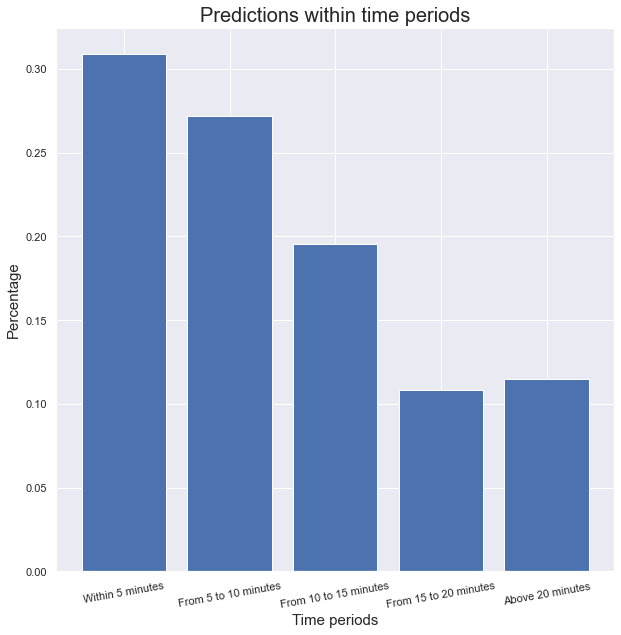

In [47]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

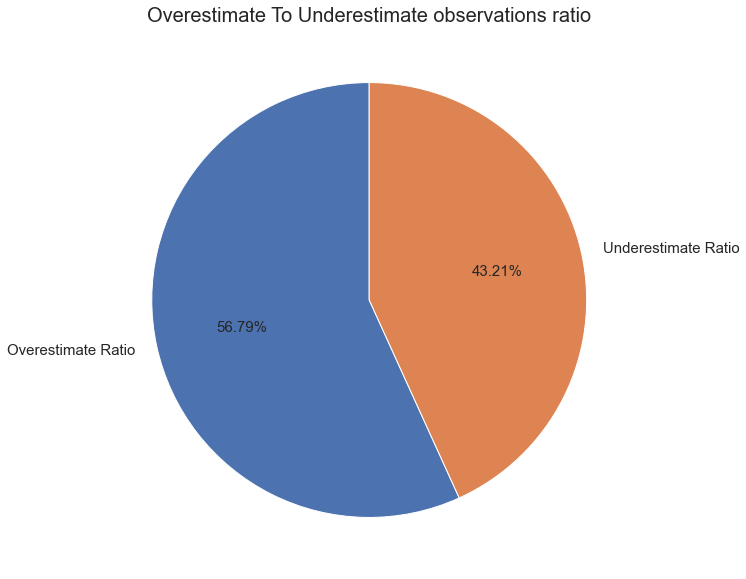

In [48]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## Random Forest Regressor

In [49]:
regr = RandomForestRegressor(n_estimators=100,max_depth=16, random_state=0)
regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_val)
print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

Mean Squared Error : 664128.9376215183
Mean Absolute Error : 617.0809594382741
R2 Score : 0.34415268848366154


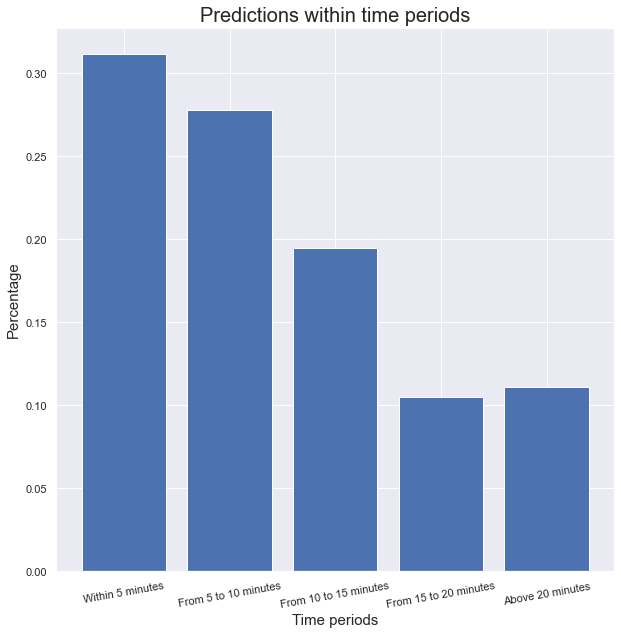

In [50]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

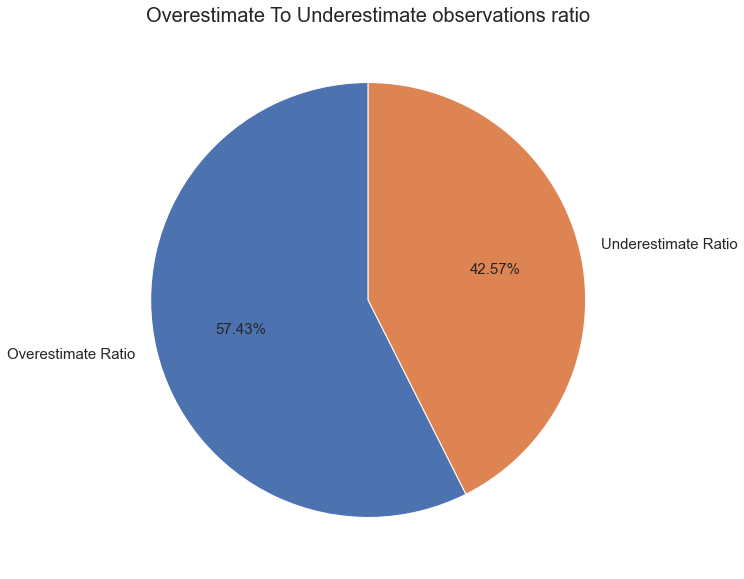

In [51]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## XGBoost Regressor

In [52]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100,max_depth=7,seed=123)  
 
xgb_r.fit(X_train, Y_train)
 
Y_pred = xgb_r.predict(X_val)

print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

[19:04:18] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error : 626543.6672812214
Mean Absolute Error : 597.0334458094436
R2 Score : 0.3812692739972814


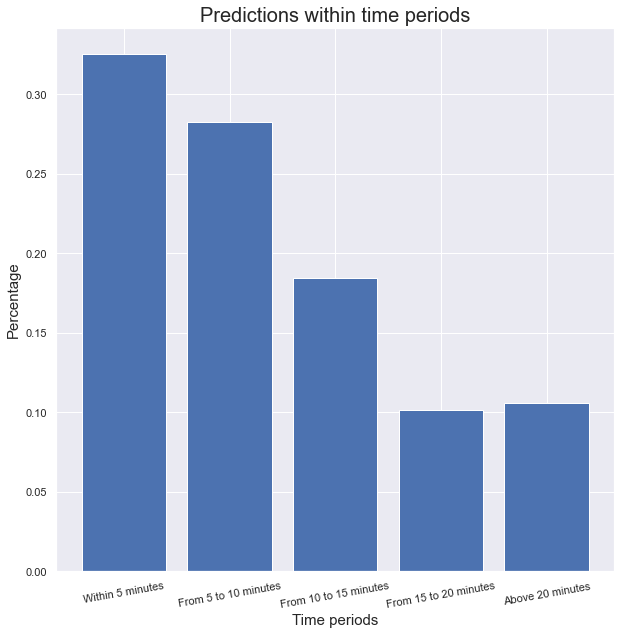

In [53]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

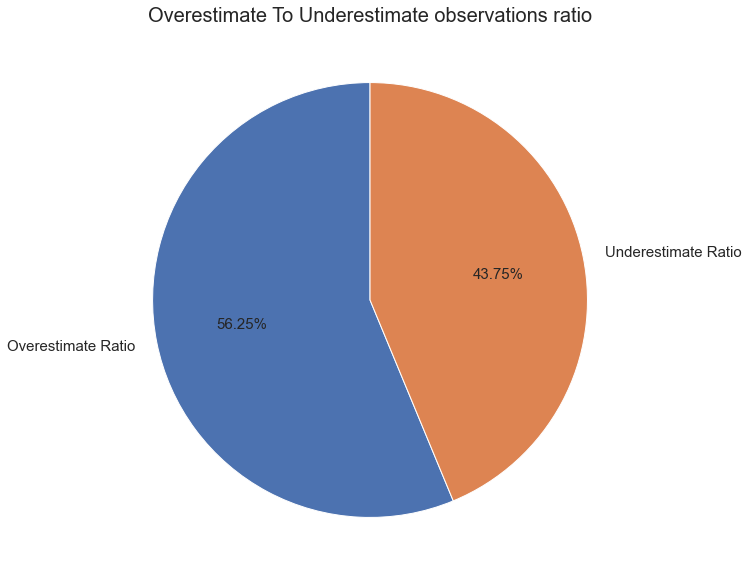

In [54]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## KNN Regressor

In [55]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_val)

print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))


Mean Squared Error : 689250.7564916395
Mean Absolute Error : 628.4087275693313
R2 Score : 0.3193441363591658


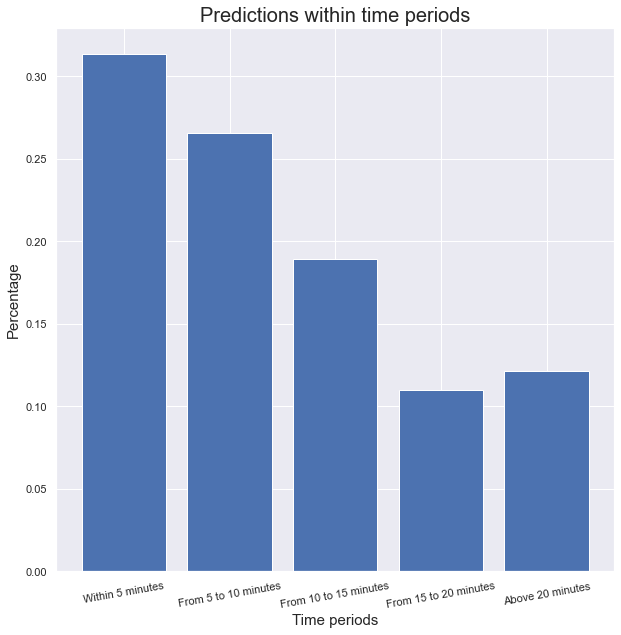

In [56]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

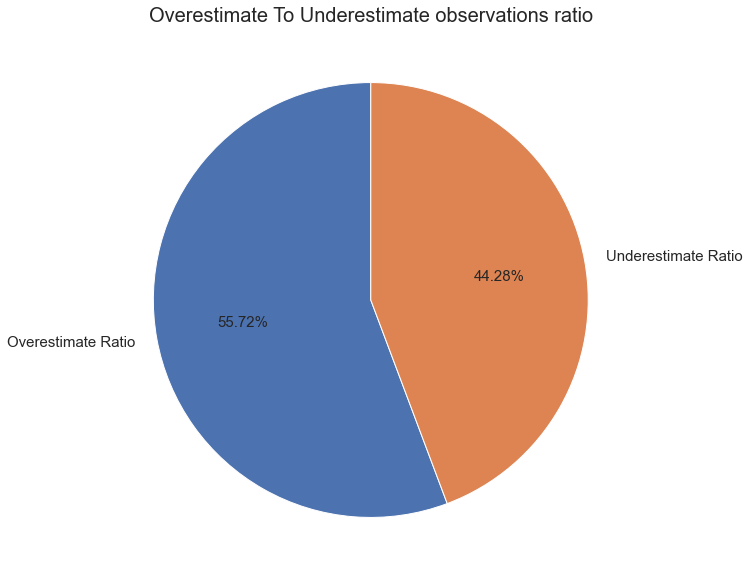

In [57]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## Decision Tree Regressor

In [58]:
DT = DecisionTreeRegressor(max_depth=7,random_state=0)
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_val)

print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

Mean Squared Error : 782476.0244038563
Mean Absolute Error : 674.4028964665412
R2 Score : 0.22728137887025524


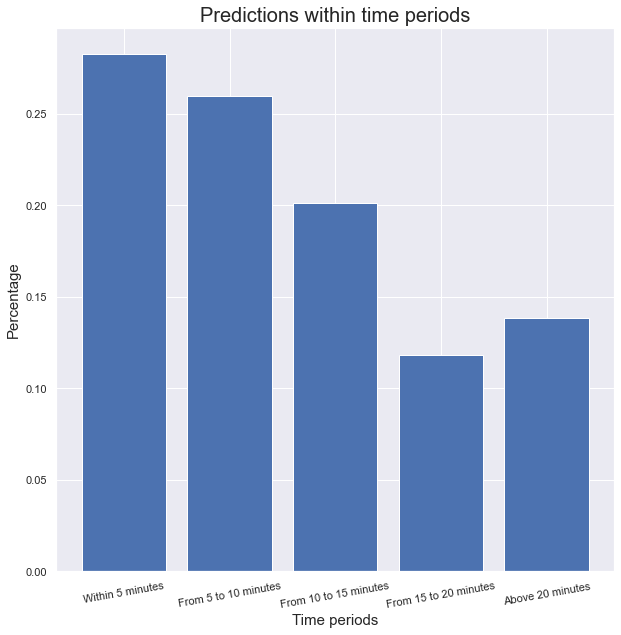

In [59]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

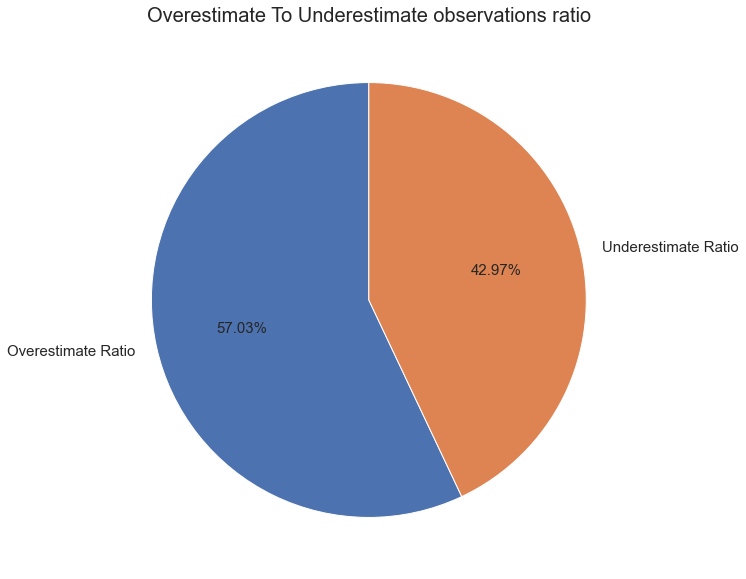

In [60]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## ElasticNet Model

In [61]:
Enet = ElasticNet(l1_ratio=1,alpha=0.1)
Enet.fit(X_train, Y_train)
Y_pred = Enet.predict(X_val)

print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

Mean Squared Error : 676177.4359381819
Mean Absolute Error : 623.5517796063427
R2 Score : 0.33225443382080533


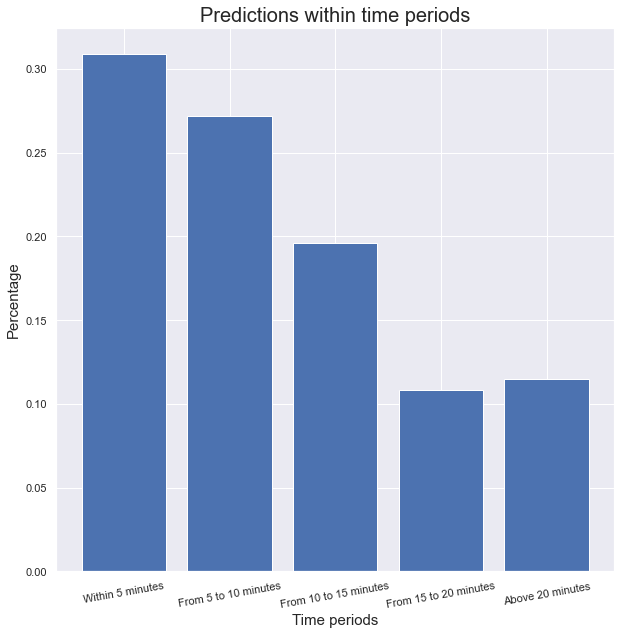

In [62]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

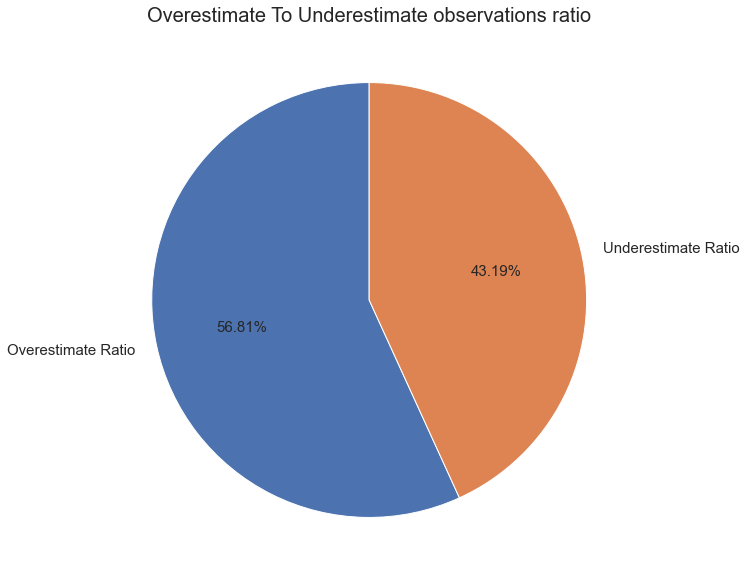

In [63]:
plot_overestimate_underestimate_ratio(Y_val,Y_pred)

## Neural Network

In [64]:
def NN_regression_model():
    model=Sequential()
    model.add(Dense(35,input_shape=(35,),kernel_initializer='normal',activation='relu'))
    #model.add(Dense(128,kernel_initializer='normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.8))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.8))
    model.add(Dense(16,kernel_initializer='normal',activation='relu'))
    
    #model.add(Dense(5,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath="toy_prediction_NN.h5",monitor='val_loss',mode='min',save_best_only=True)

In [65]:
NN_model=NN_regression_model()
NN_model.fit(X_train, Y_train,validation_data=(X_val,Y_val),epochs=50 ,callbacks=[model_checkpoint_callback] ,batch_size=64)
Y_pred = NN_model.predict(X_test)

Epoch 1/50
2452/2452 [==============================] - 3s 929us/step - loss: 1152133.7500 - val_loss: 701349.6250
Epoch 2/50
2452/2452 [==============================] - 2s 950us/step - loss: 641099.6250 - val_loss: 672337.8750
Epoch 3/50
2452/2452 [==============================] - 2s 973us/step - loss: 628358.0000 - val_loss: 665727.5625
Epoch 4/50
2452/2452 [==============================] - 2s 959us/step - loss: 621401.9375 - val_loss: 658670.0000
Epoch 5/50
2452/2452 [==============================] - 2s 925us/step - loss: 616269.2500 - val_loss: 648579.9375
Epoch 6/50
2452/2452 [==============================] - 2s 902us/step - loss: 611268.3125 - val_loss: 646061.4375
Epoch 7/50
2452/2452 [==============================] - 2s 881us/step - loss: 607819.5625 - val_loss: 641380.3750
Epoch 8/50
2452/2452 [==============================] - 2s 960us/step - loss: 605218.3125 - val_loss: 643585.6250
Epoch 9/50
2452/2452 [==============================] - 2s 926us/step - loss: 603142.56

In [66]:
NN_model=keras.models.load_model("toy_prediction_NN.h5")
Y_pred = NN_model.predict(X_val)
Y_pred_train = NN_model.predict(X_train)
print("Mean Squared Error : " + str(mean_squared_error(Y_val,Y_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(Y_val,Y_pred)))
print("R2 Score : " + str(r2_score(Y_val,Y_pred)))

4904/4904 [==============================] - 2s 493us/step
Mean Squared Error : 624826.5485636378
Mean Absolute Error : 596.0948354960655
R2 Score : 0.38296498040410465


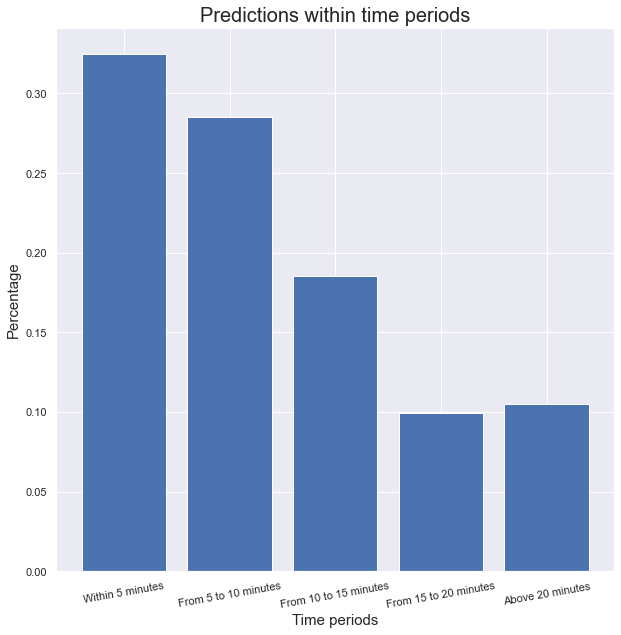

In [67]:
plot_accuracy_per_time(Y_val.to_numpy(),Y_pred)

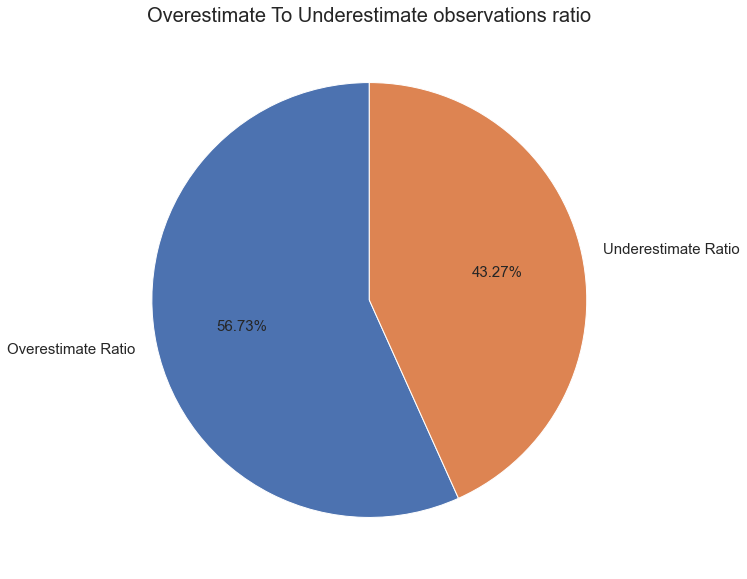

In [68]:
plot_overestimate_underestimate_ratio(Y_val.to_numpy(),Y_pred[:,0])

### We can see that the model that performs the best compared to the others are Neural network and XGBoost regressor 

## Saving our predictions on the test file

In [69]:
NN_model=keras.models.load_model("toy_prediction_NN.h5")
Y_pred_test = NN_model.predict(X_test)


1712/1712 [==============================] - 1s 539us/step


In [70]:
test_df=pd.read_csv("predict_data.csv") # we will read the test file again as we dropped few columns from it during preprocessing
test_df['Predictions']=Y_pred_test
test_df.to_csv("prediction_file.csv")